In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [4]:
df = pd.read_csv("A_Z Handwritten Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [5]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [7]:
# Creating dictionary of alphabets with indexes
word_dict = { 0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z' }

In [8]:
# Splitting x and y column form dataset
x = df.drop('0', axis = 1)
y = df['0']

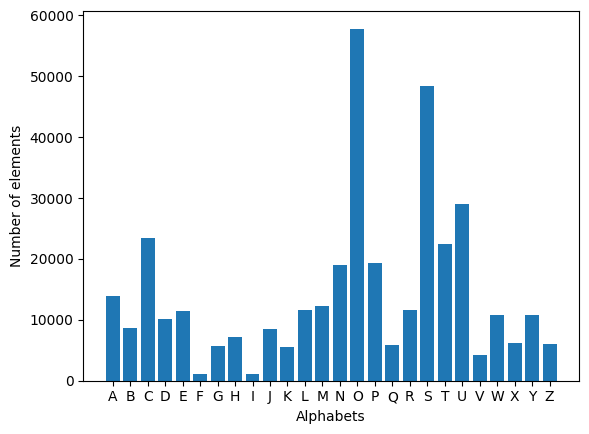

In [9]:
# Plotting number of each alphabets
y_array = y.values
count = np.zeros(26, dtype = 'int')

for i in y_array:
    count[i] += 1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

plt.bar(alphabets, count)
plt.xlabel('Alphabets')
plt.ylabel('Number of elements')
plt.show()

In [10]:
# Splitting data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train = np.reshape(x_train.values, (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28))

print()
print('Train Data Shape:', x_train.shape)
print('Test Data Shape:', x_test.shape)


Train Data Shape: (297960, 28, 28)
Test Data Shape: (74490, 28, 28)


In [16]:
# Reshaping train and test images from dataset to put in model
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
print("New shape of train data:", x_train.shape)

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print("New shape of test data:", x_test.shape)

New shape of train data: (297960, 28, 28, 1)
New shape of test data: (74490, 28, 28, 1)


In [19]:
# Converting to categorical values
categorical_train = to_categorical(y_train, num_classes = 26, dtype = 'int')
print("New shape of train labels:", categorical_train.shape)

categorical_test = to_categorical(y_test, num_classes = 26, dtype = 'int')
print("New shape of test labels:", categorical_test.shape)

New shape of train labels: (297960, 26)
New shape of test labels: (74490, 26)


In [21]:
# implementing model
my_model = Sequential()

my_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'valid'))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Flatten())

my_model.add(Dense(64, activation = "relu"))
my_model.add(Dense(128, activation = "relu"))

my_model.add(Dense(26, activation = "softmax"))

In [26]:
# Compiling the model
my_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = my_model.fit(x_train, categorical_train, epochs = 10, validation_data = (x_test, categorical_test))

Epoch 1/10
9312/9312 [==============================] - 348s 37ms/step - loss: 0.0914 - accuracy: 0.9744 - val_loss: 0.0760 - val_accuracy: 0.9790
Epoch 2/10
9312/9312 [==============================] - 366s 39ms/step - loss: 0.0662 - accuracy: 0.9819 - val_loss: 0.0592 - val_accuracy: 0.9837
Epoch 3/10
9312/9312 [==============================] - 360s 39ms/step - loss: 0.0577 - accuracy: 0.9840 - val_loss: 0.0620 - val_accuracy: 0.9826
Epoch 4/10
9312/9312 [==============================] - 363s 39ms/step - loss: 0.0542 - accuracy: 0.9851 - val_loss: 0.0532 - val_accuracy: 0.9866
Epoch 5/10
9312/9312 [==============================] - 369s 40ms/step - loss: 0.0503 - accuracy: 0.9865 - val_loss: 0.0560 - val_accuracy: 0.9859
Epoch 6/10
9312/9312 [==============================] - 378s 41ms/step - loss: 0.0501 - accuracy: 0.9871 - val_loss: 0.0566 - val_accuracy: 0.9857
Epoch 7/10
9312/9312 [==============================] - 354s 38ms/step - loss: 0.0491 - accuracy: 0.9874 - val_loss: 0

In [28]:
my_model.summary()
my_model.save(r'model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [29]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9789502024650574, 0.9836622476577759, 0.9825882911682129, 0.9865753650665283, 0.985877275466919, 0.9857162237167358, 0.9847093820571899, 0.9868170022964478, 0.9873539805412292, 0.9837696552276611]
The training accuracy is : [0.9744428992271423, 0.9819270968437195, 0.9839911460876465, 0.9851356148719788, 0.9865384697914124, 0.9870888590812683, 0.9874043464660645, 0.9878775477409363, 0.988008439540863, 0.9884111881256104]
The validation loss is : [0.0760374590754509, 0.05924002081155777, 0.06195930391550064, 0.05323949083685875, 0.05598630756139755, 0.05663150176405907, 0.06378922611474991, 0.05714594945311546, 0.05745645985007286, 0.07464369386434555]
The training loss is : [0.09140589833259583, 0.06615472584962845, 0.057667117565870285, 0.05417140573263168, 0.05034209042787552, 0.05009036883711815, 0.04913029447197914, 0.047809284180402756, 0.04739820957183838, 0.048590414226055145]


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

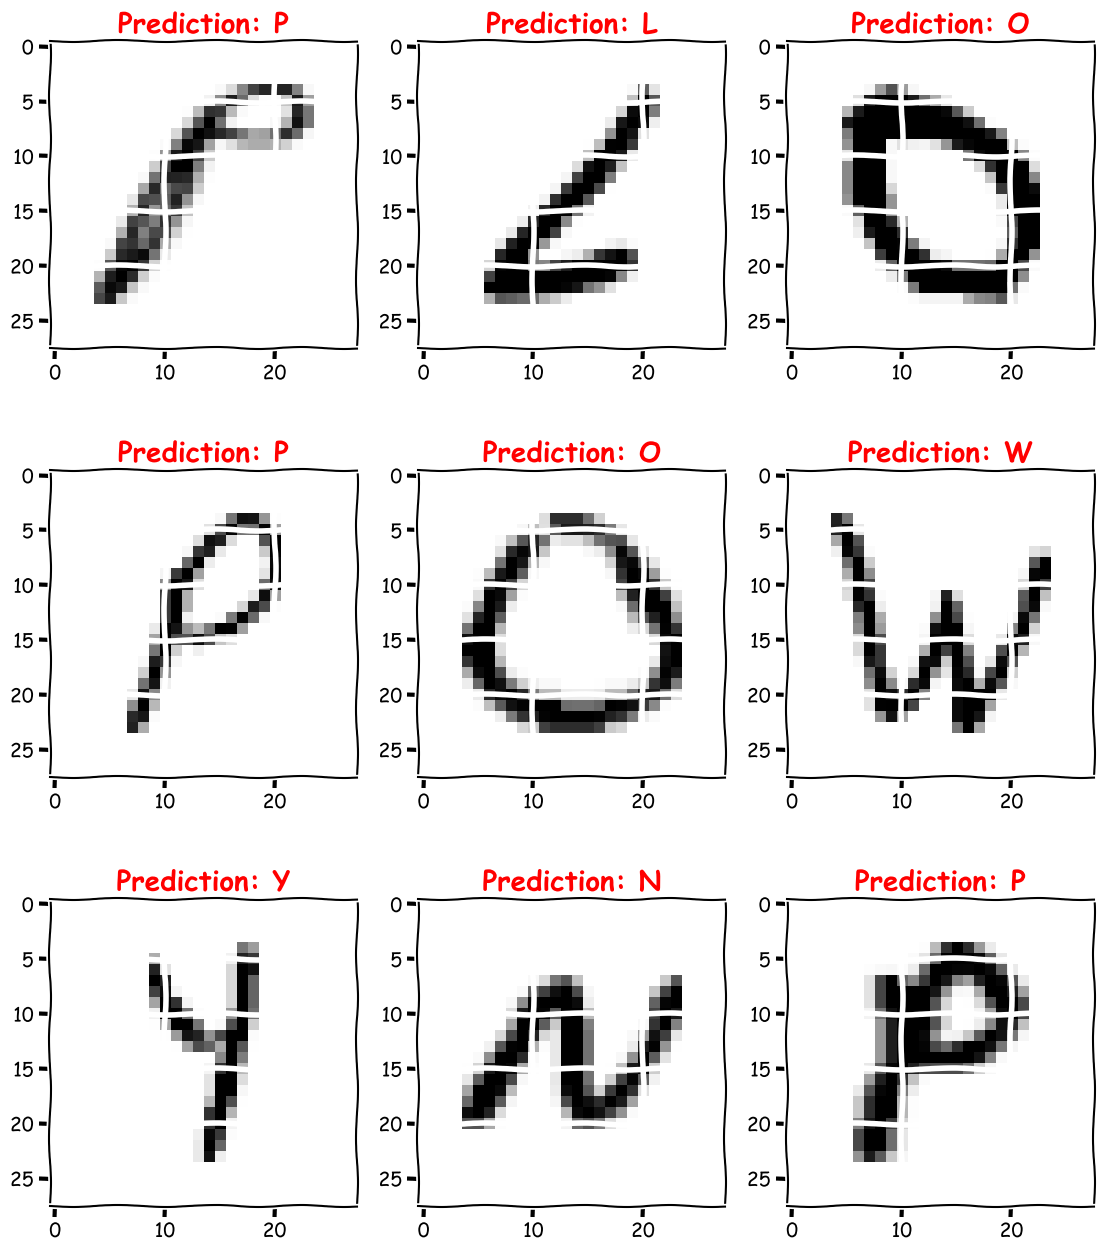

In [35]:
plt.style.use('fivethirtyeight')
plt.xkcd()

fig, axes = plt.subplots(3, 3, figsize = (12, 15))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = np.reshape(x_test[i], (28, 28))
    ax.imshow(img, cmap = 'Greys')
    
    pred = word_dict[np.argmax(categorical_test[i])]
    ax.set_title("Prediction: " + pred, fontsize = 20, fontweight = 'bold', color = 'red')
    ax.grid()
